*Gina suciyana 
2106066 *

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

dataset = pd.read_csv('stres.csv')

print('Sample Data :')
dataset.head()




Sample Data :


,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123.0,1
1,21.41,90.41,93.0,1
2,27.12,96.12,196.0,2
3,27.64,96.64,177.0,2
4,10.87,79.87,87.0,0


In [ ]:
dataset.isna().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [ ]:
dataset.dtypes

Humidity        float64
Temperature     float64
Step count      float64
Stress Level      int64
dtype: object

In [ ]:
x = dataset.iloc[:, :4]
y = dataset['Stress Level']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [ ]:
print('Decision Tree Accuracy: {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decision Tree Accuracy: 1.000


[Text(0.6, 0.8333333333333334, 'x[1] <= 91.905\ngini = 0.659\nsamples = 1400\nvalue = [367, 538, 495]'),
 Text(0.4, 0.5, 'x[1] <= 84.0\ngini = 0.482\nsamples = 905\nvalue = [367, 538, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 367\nvalue = [367, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 538\nvalue = [0, 538, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 495\nvalue = [0, 0, 495]')]

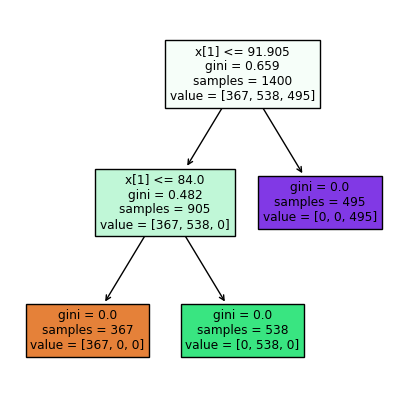

In [ ]:
plt.figure(figsize=(5, 5))
tree.plot_tree(dt, filled=True)

In [ ]:
KMeans = KMeans(n_clusters=3)
labels = KMeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
db_score = davies_bouldin_score(x, labels)
print(db_score)

0.5215319719038014


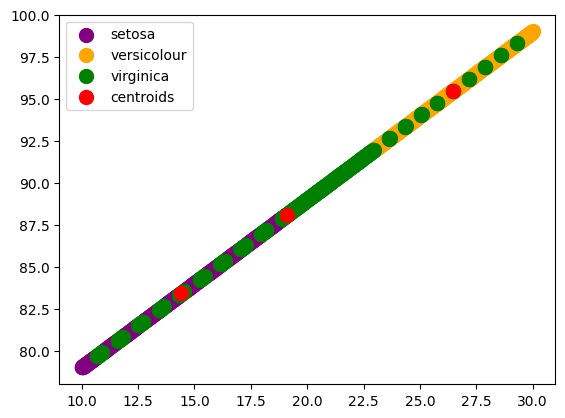

In [ ]:
cols = dataset.columns
plt.scatter(x.loc[labels == 0, cols[0]],
      x.loc[labels == 0, cols[1]],
      s=100, c='purple',
      label='setosa')
plt.scatter(x.loc[labels == 1, cols[0]],
      x.loc[labels == 1, cols[1]],
      s=100, c='orange',
      label='versicolour' )
plt.scatter(x.loc[labels == 2, cols[0]],
      x.loc[labels == 2, cols[1]],
      s=100, c='green',
      label='virginica' )
plt.scatter(KMeans.cluster_centers_[:, 0],
      KMeans.cluster_centers_[:, 1],
      s=100, c='red',
      label='centroids')
plt.legend()
